## Install and import necessary packages

In [1]:
import qulacs
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Create Hamiltonian

In [5]:
from qulacs import Observable

In [6]:
def create_qulacs_hamiltonian(n_qubit):
    coef = 2.0
    Pauli_string = "X 0 Y 2"
    observable = Observable(n_qubit)
    observable.add_operator(coef, Pauli_string)
    return observable

## Construct ansatz

In [7]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CZ, RY, RZ, merge

In [15]:
def ansatz_circuit(n_qubit, level, theta_list):
    circuit = QuantumCircuit(n_qubit)
    for l in range(level):
        for i in range(n_qubit):
            circuit.add_gate(
                merge(
                    RY(i, theta_list[2 * i + 2 * n_qubit * l]),
                    RZ(i, theta_list[2 * i + 1 + 2 * n_qubit * l]),
                )
            )
        for i in range(n_qubit // 2):
            circuit.add_gate(CZ(2 * i, 2 * i + 1))
        for i in range(n_qubit // 2 - 1):
            circuit.add_gate(CZ(2 * i + 1, 2 * i + 2))
    for i in range(n_qubit):
        circuit.add_gate(
            merge(
                RY(i, theta_list[2 * i + 2 * n_qubit * level]),
                RZ(i, theta_list[2 * i + 1 + 2 * n_qubit * level]),
            )
        )

    return circuit

## Define cost function

In [16]:
def cost(theta_list, n_qubit, level):
    # Prepare |00...0>
    state = QuantumState(n_qubit)
    # Construct quantum circuit
    circuit = ansatz_circuit(n_qubit, level, theta_list)
    # Operate quantum circuit on state
    circuit.update_quantum_state(state)
    # Calcuulate expectation value of Hamiltonian
    hamiltonian = create_qulacs_hamiltonian(n_qubit)
    return hamiltonian.get_expectation_value(state)

## Run VQE

In [34]:
n_qubit = 13
level = 3

In [35]:
cost_history = []
init_theta_list = np.random.random(2 * n_qubit * (level + 1)) * 1e-1
cost_history.append(cost(init_theta_list, n_qubit, level))
method = "BFGS"
# Nelder-Mead, Powell, CG, Newton-CG, L-BFGS-B, TNC, COBYLA, SLSQP, trust-constr, dogleg, trust-ncg, trust-exact, trust-krylov
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}

num_iter = 1


def callback(x):
    global num_iter
    cost_val = cost(x, n_qubit, level)
    cost_history.append(cost_val)
    print(f'{num_iter}/{options["maxiter"]}\t{cost_val}')
    num_iter += 1


print("Iter\tcost")
opt = minimize(
    cost,
    init_theta_list,
    args=(n_qubit, level),
    method=method,
    options=options,
    callback=callback,
)

Iter	cost
1	-1.6181058583843677
2	-1.6189896532893442
3	-1.7588917473699561
4	-1.956455343598472
5	-1.9878284977450853
6	-1.9962788076355507
7	-1.9998723592079584
8	-1.999951936979173
9	-1.999963219425712
10	-1.9999791204466302
11	-1.9999930581589125
12	-1.9999965668492168
13	-1.9999967703745762
14	-1.9999968197020723
15	-1.9999969093466328
16	-1.9999970691600721
17	-1.999997325873095
18	-1.999997561407895
19	-1.9999976289391386
20	-1.9999976978202216
21	-1.9999977493662915
22	-1.9999978400690233
23	-1.999998001686986
24	-1.9999982824486302
25	-1.9999987355523907
26	-1.99999931253876
27	-1.9999996650566343
28	-1.9999998480883605
29	-1.9999998673782236
30	-1.999999867804763
31	-1.9999998681672813
32	-1.9999998688448761
33	-1.9999998701200719
34	-1.9999998724752868
35	-1.9999998761699391
36	-1.9999998824951746
37	-1.9999998927059797
38	-1.9999999103140367
39	-1.999999938518468
40	-1.9999999770292838
41	-1.9999999949294767
42	-1.9999999994588296
43	-1.9999999998966453
44	-1.99999999994197

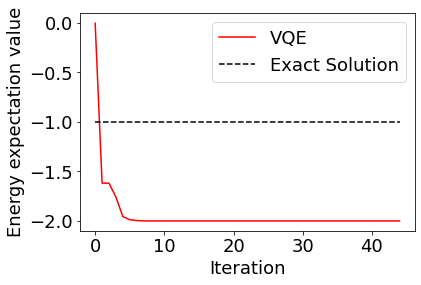

In [36]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.plot(
    range(len(cost_history)),
    [-1.0] * len(cost_history),
    linestyle="dashed",
    color="black",
    label="Exact Solution",
)
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

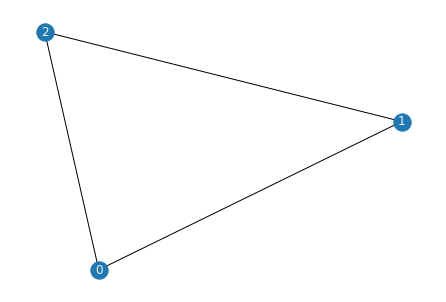

In [3]:
from maxcut_instance_generator import regular_graph

model = regular_graph(3, 2, draw=True)

In [4]:
model.get_objective_expr()

docplex.mp.quad.QuadExpr(-4x0*x1-4x0*x2-4x1*x2+4x0+4x1+4x2)

In [5]:
str(model.get_objective_expr())

'-4x0*x1-4x0*x2-4x1*x2+4x0+4x1+4x2'

In [6]:
model.solve()

docplex.mp.solution.SolveSolution(obj=4,values={x0:1})

In [10]:
model.objective_sense.value

2

In [19]:
model.objective_expr.constant

0

In [21]:
model.objective_expr.linear_part

docplex.mp.LinearExpr(4x0+4x1+4x2)

In [43]:
for i, j, coef in model.objective_expr.iter_quad_triplets():
    print(i.name, j.name, coef)

x0 x1 -4
x0 x2 -4
x1 x2 -4


In [45]:
sense = -1 if model.is_maximized() else 1

In [41]:
import numpy as np

linear = np.zeros(model.number_of_binary_variables)
for idx, coef in model.objective_expr.linear_part:
    weight = coef * sense / 2
    linear[idx] -= weight
    offset += weight

TypeError: 